In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# URL similar to what was used in section

import requests
from bs4 import BeautifulSoup

# URL of the webpage, similar to what was used in section
url = "https://www.gutenberg.org/cache/epub/36/pg36-images.html#chap03"

# Send a request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all the <p> tags in the HTML
    paragraphs = soup.find_all('p')

    # Extract text from each <p> tag and store it as a list of paragraphs
    paragraph_list = [p.get_text(strip=True) for p in paragraphs]

else:
    print("Failed to retrieve the webpage.")

paragraphs = paragraph_list[8:27] #20 paragraphs


In [22]:
# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize and lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

# Preprocess each paragraph and keep track of the original index
processed_paragraphs = [preprocess_text(paragraph) for paragraph in paragraphs]
original_index_mapping = {processed_paragraphs[i]: i for i in range(len(paragraphs))}


# Display samples of the processed paragraphs
print("Sample processed paragraphs:")
for i, processed_paragraph in enumerate(processed_paragraphs[:3]):
    print(f"Paragraph {i+1}: {processed_paragraph}\n")

Sample processed paragraphs:
Paragraph 1: secular cooling must someday overtake planet already gone far indeed neighbour physical condition still largely mystery know even equatorial region midday temperature barely approach coldest winter air much attenuated ocean shrunk cover third surface slow season change huge snowcap gather melt either pole periodically inundate temperate zone last stage exhaustion u still incredibly remote become problem inhabitant mar immediate pressure necessity brightened intellect enlarged power hardened heart looking across space instrument intelligence scarcely dreamed see nearest distance mile sunward morning star hope warmer planet green vegetation grey water cloudy atmosphere eloquent fertility glimpse drifting cloud wisp broad stretch populous country narrow sea

Paragraph 2: men creature inhabit earth must least alien lowly monkey lemur u intellectual side man already admits life incessant struggle existence would seem belief mind upon mar world far g

In [23]:
# Note: Could have tokenized the paragraphs into words similar to what was done in
# section, I tried this and it also works. However, I thought I'd stick strictly
# to the assignment instructions and kept the full paragraphs here.

# Tokenize each processed paragraph for gensim's Dictionary
tokenized_paragraphs = [paragraph.split() for paragraph in processed_paragraphs]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenized_paragraphs)
corpus = [dictionary.doc2bow(text) for text in tokenized_paragraphs]

# Set number of topics and train the LDA model
num_topics = 6
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=123)

# Extract Topics and Top Words
topics = lda_model.print_topics(num_words=10)
for topic_num, topic in topics:
    print(f"\nTopic {topic_num + 1}: {topic}")

# Find the Most Representative Paragraphs for Each Topic
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

# Identify the 2 most associated paragraphs for each topic
associated_docs = {}
for topic_num in range(num_topics):
    topic_docs = sorted(enumerate(doc_topics), key=lambda x: -dict(x[1]).get(topic_num, 0))[:2]
    associated_docs[topic_num] = [processed_paragraphs[doc_id] for doc_id, _ in topic_docs]



Topic 1: 0.012*"planet" + 0.010*"u" + 0.009*"mar" + 0.008*"paper" + 0.008*"upon" + 0.006*"day" + 0.006*"opposition" + 0.006*"one" + 0.006*"nearer" + 0.005*"much"

Topic 2: 0.013*"light" + 0.010*"night" + 0.008*"u" + 0.008*"little" + 0.008*"mar" + 0.007*"earth" + 0.007*"pointed" + 0.007*"telescope" + 0.007*"distance" + 0.007*"went"

Topic 3: 0.014*"night" + 0.011*"planet" + 0.010*"hundred" + 0.009*"one" + 0.008*"first" + 0.008*"falling" + 0.008*"star" + 0.007*"flame" + 0.007*"mile" + 0.007*"idea"

Topic 4: 0.011*"planet" + 0.011*"little" + 0.010*"night" + 0.010*"one" + 0.009*"nothing" + 0.008*"must" + 0.008*"saw" + 0.008*"day" + 0.008*"people" + 0.008*"mile"

Topic 5: 0.015*"night" + 0.011*"martian" + 0.008*"mar" + 0.008*"one" + 0.008*"far" + 0.007*"earth" + 0.007*"remember" + 0.006*"planet" + 0.006*"century" + 0.006*"seen"

Topic 6: 0.014*"gas" + 0.013*"night" + 0.011*"planet" + 0.010*"u" + 0.010*"towards" + 0.009*"earth" + 0.009*"upon" + 0.007*"came" + 0.007*"hundred" + 0.007*"midnig

In [24]:
# Print Results with Full Words as Topic Labels
for topic_num, top_words in enumerate(topics):
    # Extract the top 3 words for the label without splitting or trimming
    words = ", ".join([word.split("*")[1].strip().strip('"') for word in top_words[1].split(" + ")[:3]])
    print(f"\nTopic {topic_num + 1} - Label: {words}")
    
    # Print the specific original paragraph index along with its content
    for doc in associated_docs[topic_num]:
        original_index = original_index_mapping.get(doc, None)
        print(f"Document {original_index + 1}:\n{paragraphs[original_index]}\n")


Topic 1 - Label: planet, u, mar
Document 16:
Even the daily papers woke up to the disturbances at last, and popular notes
appeared here, there, and everywhere concerning the volcanoes upon Mars. The
seriocomic periodicalPunch, I remember, made a happy use of it in the
political cartoon. And, all unsuspected, those missiles the Martians had fired
at us drew earthward, rushing now at a pace of many miles a second through the
empty gulf of space, hour by hour and day by day, nearer and nearer. It seems
to me now almost incredibly wonderful that, with that swift fate hanging over
us, men could go about their petty concerns as they did. I remember how
jubilant Markham was at securing a new photograph of the planet for the
illustrated paper he edited in those days. People in these latter times
scarcely realise the abundance and enterprise of our nineteenth-century papers.
For my own part, I was much occupied in learning to ride the bicycle, and busy
upon a series of papers discussing the pr

In [25]:
#Problem 2

In [26]:
# Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenized_paragraphs)
corpus = [dictionary.doc2bow(text) for text in tokenized_paragraphs]

# Implement LDA Model for a range of topics and evaluate coherence and exclusivity
topic_range = range(2, 10)
coherence_scores = []
exclusivity_scores = []

def calculate_exclusivity_score(lda_model, num_top_words=10):
    topics = lda_model.show_topics(formatted=False, num_words=num_top_words)
    word_sets = [set([word for word, _ in topic[1]]) for topic in topics]
    
    total_pairs = 0
    common_words = 0
    
    for i in range(len(word_sets)):
        for j in range(i + 1, len(word_sets)):
            total_pairs += 1
            common_words += len(word_sets[i].intersection(word_sets[j]))
    
    exclusivity_score = 1 - (common_words / (total_pairs * num_top_words))
    return exclusivity_score

for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, 
                         random_state=123)
    
    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_paragraphs, 
                                     dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    
    # Calculate exclusivity score
    exclusivity_score = calculate_exclusivity_score(lda_model)
    exclusivity_scores.append(exclusivity_score)

print(exclusivity_scores)


[0.30000000000000004, 0.5, 0.6666666666666667, 0.75, 0.7333333333333334, 0.7047619047619047, 0.7642857142857142, 0.8333333333333334]


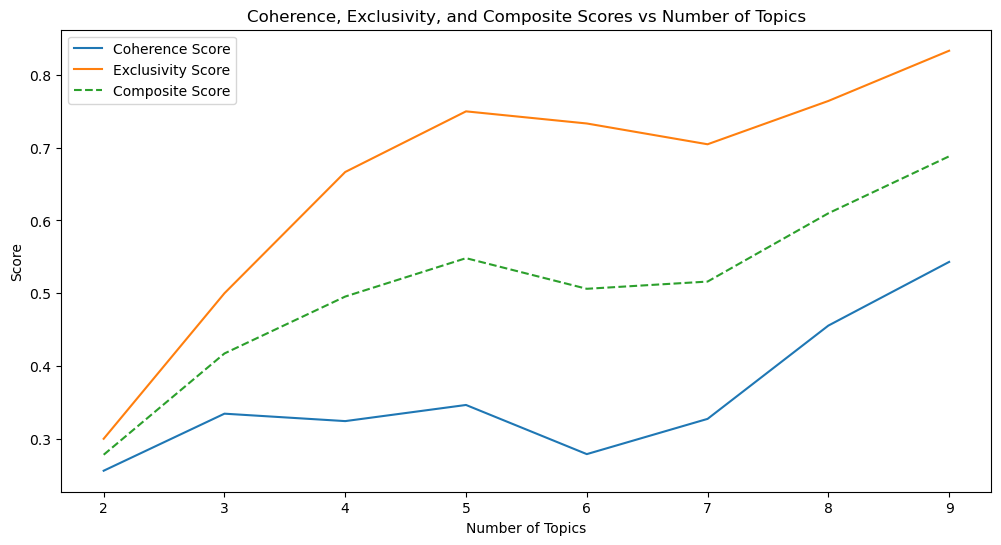

In [27]:
# Plot coherence, exclusivity, and composite score
composite_scores = [0.5 * coherence + 0.5 * exclusivity for coherence, exclusivity in zip
                    (coherence_scores, exclusivity_scores)]

plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores, label="Coherence Score")
plt.plot(topic_range, exclusivity_scores, label="Exclusivity Score")
plt.plot(topic_range, composite_scores, label="Composite Score", linestyle="--")
plt.xlabel("Number of Topics")
plt.ylabel("Score")
plt.legend()
plt.title("Coherence, Exclusivity, and Composite Scores vs Number of Topics")
plt.show()


In [28]:
# Select the optimal number of topics based on the highest composite score
optimal_num_topics = topic_range[np.argmax(composite_scores)]
print(f"Optimal Number of Topics: {optimal_num_topics}")

# Train the final LDA model with the optimal number of topics
final_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, 
                           random_state=123)

Optimal Number of Topics: 9


In [33]:
# Display the top 10 words and short labels for each topic in the final model
topics = final_lda_model.show_topics(num_words=10, formatted=False)
for topic_num, topic in topics:
    words = [word for word, _ in topic]
    print(f"\nTopic {topic_num + 1}")
    print(f"Top Words: {', '.join(words)}")

# Identify and display the two most associated original paragraphs for each topic
doc_topics = [final_lda_model.get_document_topics(bow) for bow in corpus]

for topic_num in range(optimal_num_topics):
    # Sort documents by the probability of belonging to the current topic
    topic_docs = sorted(enumerate(doc_topics), key=lambda x: -dict(x[1]).get(topic_num, 0))[:2]
    
    # Display the topic, its label, and representative paragraphs
    short_label = ", ".join([word for word, _ in topics[topic_num][1][:3]])
    print(f"\nTopic {topic_num + 1} - Label: {short_label} - \nRepresentative Documents:")
    for i, (doc_idx, _) in enumerate(topic_docs):
        if doc_idx < len(paragraphs):
            print(f"Original Paragraph Index {doc_idx + 1}:\n{paragraphs[doc_idx]}\n")



Topic 1
Top Words: planet, gas, upon, mar, huge, u, flaming, towards, gun, outbreak

Topic 2
Top Words: upon, world, generation, crowded, life, u, still, mar, light, cooling

Topic 3
Top Words: planet, idea, might, mar, condition, huge, u, signalling, vulgar, progress

Topic 4
Top Words: nothing, night, one, saw, day, ever, ottershaw, heard, yet, must

Topic 5
Top Words: night, martian, far, planet, century, flame, earth, fluctuating, mar, instrument

Topic 6
Top Words: gas, planet, night, towards, mile, million, forty, midnight, u, ogilvy

Topic 7
Top Words: night, upon, one, remember, ogilvy, light, little, way, another, darkness

Topic 8
Top Words: mile, one, first, seen, telescope, u, remember, hundred, light, star

Topic 9
Top Words: paper, u, missile, mar, pointed, light, scarcely, day, night, hour

Topic 1 - Label: planet, gas, upon - 
Representative Documents:
Original Paragraph Index 6:
The storm burst upon us six years ago now. As Mars approached opposition,
Lavelle of Java 

In [32]:
# Calculate and display topic prevalence for each document
# (Not required for assignment but shown in section so I thought I'd try this)
print("\nTopic Prevalence per Document:")

for doc_idx, topic_distribution in enumerate(doc_topics):
    print(f"\nDocument {doc_idx + 1}:")
    for topic_num, prevalence in topic_distribution:
        print(f"  Topic {topic_num + 1}: {prevalence:.4f}")


Topic Prevalence per Document:

Document 1:
  Topic 5: 0.9914

Document 2:
  Topic 2: 0.9819

Document 3:
  Topic 7: 0.9772

Document 4:
  Topic 5: 0.9811

Document 5:
  Topic 8: 0.9807

Document 6:
  Topic 1: 0.9857

Document 7:
  Topic 4: 0.9798

Document 8:
  Topic 8: 0.9880

Document 9:
  Topic 6: 0.9671

Document 10:
  Topic 8: 0.9861

Document 11:
  Topic 6: 0.8475
  Topic 7: 0.1340

Document 12:
  Topic 7: 0.9822

Document 13:
  Topic 3: 0.9731

Document 14:
  Topic 1: 0.0139
  Topic 2: 0.0139
  Topic 3: 0.0139
  Topic 4: 0.8888
  Topic 5: 0.0139
  Topic 6: 0.0139
  Topic 7: 0.0139
  Topic 8: 0.0139
  Topic 9: 0.0139

Document 15:
  Topic 5: 0.9802

Document 16:
  Topic 8: 0.9904

Document 17:
  Topic 2: 0.7912
  Topic 8: 0.1983

Document 18:
  Topic 8: 0.9822

Document 19:
  Topic 4: 0.9852
